In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define simple data ---
# Suppose these are your observed house sizes (in sq. meters)
sizes = np.array([50, 75, 100, 125, 150])
# And these are the corresponding prices (in thousands)
prices = np.array([200, 275, 350, 425, 500])

# --- Step 2: Initialize parameters ---
w = np.random.randn()  # weight
b = np.random.randn()  # bias

# --- Step 3: Learning rate and training steps ---
learning_rate = 0.00001
epochs = 200

# Store loss to visualize later
loss_history = []

# --- Step 4: Training (gradient descent) ---
for epoch in range(epochs):
    # Prediction
    pred = w * sizes + b

    print("Prediction: ",pred)

    # Loss (Mean Squared Error)
    loss = np.mean((pred - prices) ** 2)
    loss_history.append(loss)

    # Gradients (partial derivatives)
    dw = np.mean(2 * (pred - prices) * sizes)
    db = np.mean(2 * (pred - prices))

    # Update parameters using SGD(Stochastic Gradient Descent)
    w -= learning_rate * dw
    b -= learning_rate * db

# --- Step 5: Show results ---
print(f"Trained weight (w): {w:.3f}")
print(f"Trained bias (b): {b:.3f}")

# --- Step 6: Plot data and learned line ---
plt.scatter(sizes, prices, color='blue', label='Actual Data')
plt.plot(sizes, w * sizes + b, color='red', label='Learned Line')
plt.title("Simple House Price Prediction")
plt.xlabel("Size (sq. meters)")
plt.ylabel("Price (thousands)")
plt.legend()
plt.show()

# --- Step 7: Predict your own price ---
new_size = float(input("Enter a house size (sq. meters): "))
predicted_price = w * new_size + b
print(f"Predicted price for {new_size} sq. meters = {predicted_price:.2f} thousand pesos")

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Simulated dataset: house size (in square meters) and price (in thousands)
# True relationship: price = 50 * size + 100  (so bias = 100)
x = np.array([50, 75, 100, 125, 150, 175, 200])   # house size
y = np.array([2550, 3850, 5100, 6400, 7600, 8900, 10100])  # in thousand pesos

# Initialize weight (only one parameter)
w = 0.0
learning_rate = 0.0000001  # small because values are large
epochs = 100

# For visualization
history_w = []
history_loss = []

for i in range(epochs):
    # Prediction (no bias)
    y_pred = w * x

    # Mean Squared Error
    loss = np.mean((y - y_pred)**2)

    # Derivative of loss w.r.t. w
    dw = -2 * np.mean(x * (y - y_pred))

    # Update rule
    w -= learning_rate * dw

    history_w.append(w)
    history_loss.append(loss)

    if i % 10 == 0:
        print(f"Epoch {i+1}: w={w:.4f}, loss={loss:.2f}")

# Final results
print(f"\nFinal weight: {w:.4f}")
print("Predictions:", w * x)

# --- Visualization ---
plt.figure(figsize=(10,4))

# Plot data and predicted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='red', label='Actual House Prices')
plt.plot(x, w * x, color='blue', label=f'Predicted Line (no bias)')
plt.title("House Price Prediction with ONE Parameter (No Bias)")
plt.xlabel("House Size (sq. meters)")
plt.ylabel("Price (thousands)")
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_loss, color='green')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define simple data ---
sizes = np.array([50, 75, 100, 125, 150])
prices = np.array([200, 275, 350, 425, 500])

# --- Helper function for training ---
def train_linear_regression(x, y, lr=0.0001, epochs=200):
    w = np.random.randn()
    b = np.random.randn()
    loss_history = []

    for epoch in range(epochs):
        pred = w * x + b
        loss = np.mean((pred - y) ** 2)
        loss_history.append(loss)

        # Gradients
        dw = np.mean(2 * (pred - y) * x)
        db = np.mean(2 * (pred - y))

        # Update
        w -= lr * dw
        b -= lr * db

    return w, b, loss_history

# =========================
# 1️⃣ Original Data
w_orig, b_orig, loss_orig = train_linear_regression(sizes, prices, lr=0.00001)

# Plot original
plt.scatter(sizes, prices, color='blue', label='Original Data')
plt.plot(sizes, w_orig * sizes + b_orig, color='red', label='Learned Line (Original)')
plt.title("Original House Price Prediction")
plt.xlabel("Size (sq. meters)")
plt.ylabel("Price (thousands)")
plt.legend()
plt.show()

print("Original Data Trained Parameters:")
print(f"w = {w_orig:.3f}, b = {b_orig:.3f}")

# =========================
# 2️⃣ Normalized Data
sizes_norm = (sizes - np.mean(sizes)) / np.std(sizes)
prices_norm = (prices - np.mean(prices)) / np.std(prices)

w_norm, b_norm, loss_norm = train_linear_regression(sizes_norm, prices_norm, lr=0.01)

# Plot normalized
plt.scatter(sizes_norm, prices_norm, color='green', label='Normalized Data')
plt.plot(sizes_norm, w_norm * sizes_norm + b_norm, color='orange', label='Learned Line (Normalized)')
plt.title("Normalized House Price Prediction")
plt.xlabel("Normalized Size")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

print("Normalized Data Trained Parameters:")
print(f"w = {w_norm:.3f}, b = {b_norm:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define simple data ---
sizes = np.array([50, 75, 100, 125, 150])
prices = np.array([200, 275, 350, 425, 500])

# --- Step 1.5: Normalize features and targets ---
sizes_norm = (sizes - np.mean(sizes)) / np.std(sizes)
prices_norm = (prices - np.mean(prices)) / np.std(prices)

# --- Step 2: Initialize parameters ---
w = np.random.randn()  # weight
b = np.random.randn()  # bias

# --- Step 3: Learning rate and training steps ---
learning_rate = 0.01  # can use larger LR for normalized data
epochs = 200

# Store loss to visualize later
loss_history = []

# --- Step 4: Training (gradient descent) ---
for epoch in range(epochs):
    # Prediction
    pred = w * sizes_norm + b

    # Loss (Mean Squared Error)
    loss = np.mean((pred - prices_norm) ** 2)
    loss_history.append(loss)

    # Gradients (partial derivatives)
    dw = np.mean(2 * (pred - prices_norm) * sizes_norm)
    db = np.mean(2 * (pred - prices_norm))

    # Update parameters using SGD
    w -= learning_rate * dw
    b -= learning_rate * db

# --- Step 5: Show results ---
print(f"Trained weight (w): {w:.3f}")
print(f"Trained bias (b): {b:.3f}")

# --- Step 6: Plot data and learned line ---
plt.scatter(sizes_norm, prices_norm, color='blue', label='Normalized Data')
plt.plot(sizes_norm, w * sizes_norm + b, color='red', label='Learned Line')
plt.title("Normalized House Price Prediction")
plt.xlabel("Normalized Size")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# --- Step 7: Predict your own price (normalized) ---
new_size = float(input("Enter a house size (sq. meters): "))

# Normalize the input
new_size_norm = (new_size - np.mean(sizes)) / np.std(sizes)

# Predict normalized price
predicted_price_norm = w * new_size_norm + b

# Convert back to original scale
predicted_price = predicted_price_norm * np.std(prices) + np.mean(prices)

print(f"Predicted price for {new_size} sq. meters = {predicted_price:.2f} thousand pesos")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Original data ---
sizes = np.array([50, 75, 100, 125, 150])
prices = np.array([200, 275, 350, 425, 500])

# --- Step 1.5: Normalize ---
sizes_norm = (sizes - np.mean(sizes)) / np.std(sizes)
prices_norm = (prices - np.mean(prices)) / np.std(prices)

# --- Step 2: Simulate "folds" for evaluation ---
# Let's create 5 simple folds (leave-one-out for example)
fold_losses = []

for i in range(len(sizes_norm)):
    # Split: use i-th point as "test", rest as "train"
    X_train = np.delete(sizes_norm, i)
    y_train = np.delete(prices_norm, i)
    X_test = sizes_norm[i]
    y_test = prices_norm[i]
    
    # --- Train simple linear regression on this fold ---
    w = np.sum((X_train - np.mean(X_train)) * (y_train - np.mean(y_train))) / np.sum((X_train - np.mean(X_train))**2)
    b = np.mean(y_train) - w * np.mean(X_train)
    
    # Predict the test point
    y_pred = w * X_test + b
    
    # Compute loss (squared error)
    loss = (y_pred - y_test) ** 2
    fold_losses.append(loss)

# --- Step 3: Evaluate mean loss ---
fold_losses = np.array(fold_losses)
mean_loss = np.mean(fold_losses)

print("Loss per fold:", fold_losses)
print("Mean loss across folds:", mean_loss)

# --- Step 4: Optional visualization ---
plt.bar(np.arange(1, len(fold_losses)+1), fold_losses, color='skyblue')
plt.axhline(mean_loss, color='red', linestyle='--', label=f"Mean Loss: {mean_loss:.3f}")
plt.xlabel("Fold")
plt.ylabel("Squared Error")
plt.title("Fold Losses and Mean Loss")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Create sample data ---
np.random.seed(42)

# Positive correlation
x1 = np.arange(0, 10)
y1 = x1 + np.random.normal(0, 1, 10)

# Negative correlation
x2 = np.arange(0, 10)
y2 = 10 - x2 + np.random.normal(0, 1, 10)

# No correlation
x3 = np.arange(0, 10)
y3 = np.random.randint(0, 10, 10)

# --- Step 2: Plot ---
plt.figure(figsize=(13, 4))

# Positive correlation
plt.subplot(1, 3, 1)
plt.scatter(x1, y1, color='orange', label='Y values')
plt.plot(x1, y1, color='skyblue', linestyle='--', label='X → movement')
plt.title("Positive Correlation")
plt.xlabel("X (increases →)")
plt.ylabel("Y")
plt.legend()

# Negative correlation
plt.subplot(1, 3, 2)
plt.scatter(x2, y2, color='orange', label='Y values')
plt.plot(x2, y2, color='skyblue', linestyle='--', label='X → movement')
plt.title("Negative Correlation")
plt.xlabel("X (increases →)")
plt.ylabel("Y")
plt.legend()

# No correlation
plt.subplot(1, 3, 3)
plt.scatter(x3, y3, color='orange', label='Y values')
plt.plot(x3, y3, color='skyblue', linestyle='--', label='X → movement')
plt.title("No Correlation")
plt.xlabel("X (increases →)")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Example dataset (arrays only) ---
num_rooms = np.array([2, 3, 4, 3, 5, 4, 6])
house_size = np.array([1000, 1300, 1600, 1500, 2000, 1800, 2200])
distance_to_city = np.array([10, 8, 6, 7, 4, 5, 3])
price = np.array([200000, 250000, 300000, 280000, 400000, 350000, 420000])

# --- Compute pairwise correlations ---
corr_rooms_price = np.corrcoef(num_rooms, price)[0, 1]
corr_size_price = np.corrcoef(house_size, price)[0, 1]
corr_distance_price = np.corrcoef(distance_to_city, price)[0, 1]
corr_rooms_size = np.corrcoef(num_rooms, house_size)[0, 1]

print("Correlation (num_rooms vs price):", round(corr_rooms_price, 2))
print("Correlation (house_size vs price):", round(corr_size_price, 2))
print("Correlation (distance_to_city vs price):", round(corr_distance_price, 2))
print("Correlation (num_rooms vs house_size):", round(corr_rooms_size, 2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Normal Distribution ---
normal_data = np.random.normal(loc=50, scale=10, size=1000)

# --- 2. Skewed Distribution (right-skewed) ---
skewed_data = np.random.exponential(scale=10, size=1000) + 20

# --- 3. Data with Gaps ---
gap_data = np.concatenate([
    np.random.normal(30, 5, 500),  # cluster 1
    np.random.normal(70, 5, 500)   # cluster 2
])

# --- Plotting ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Normal
axes[0].hist(normal_data, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Normal Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Skewed
axes[1].hist(skewed_data, bins=30, color='salmon', edgecolor='black')
axes[1].set_title("Right-Skewed Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Gap
axes[2].hist(gap_data, bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title("Data with Gaps (Bimodal)")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data Generation ---

# Normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=1000)

# Positive skew (tail to the right)
pos_skew_data = np.random.exponential(scale=10, size=1000) + 30

# Negative skew (tail to the left)
neg_skew_data = -np.random.exponential(scale=10, size=1000) + 70

# --- Plotting ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Function to plot histogram with mean & median
def plot_hist(data, ax, title):
    ax.hist(data, bins=30, color='skyblue', edgecolor='black')
    mean = np.mean(data)
    median = np.median(data)
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    ax.set_title(title)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.legend()

# Normal
plot_hist(normal_data, axes[0], "Normal Distribution")

# Positive skew
plot_hist(pos_skew_data, axes[1], "Positive Skew (Right Tail)")

# Negative skew
plot_hist(neg_skew_data, axes[2], "Negative Skew (Left Tail)")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate uniform random numbers between 0 and 1
data = np.random.uniform(0, 1, 10000)

plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Uniform Distribution (0 to 1)")
plt.show()


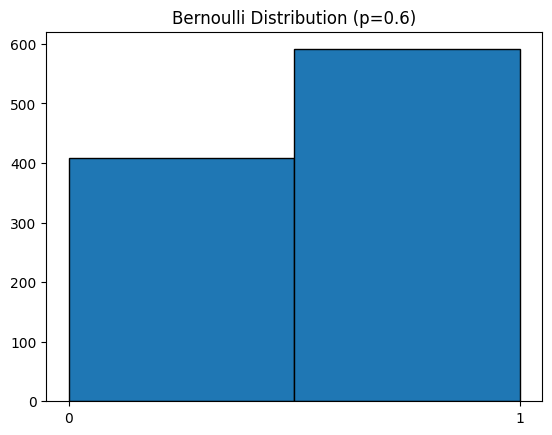

Mean: 0.591
Variance: 0.241719


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Bernoulli samples (1=success, 0=failure)
p = 0.6  # probability of success
data = np.random.binomial(1, p, 1000)

plt.hist(data, bins=2, edgecolor='black')
plt.xticks([0, 1])
plt.title(f"Bernoulli Distribution (p={p})")
plt.show()

print("Mean:", np.mean(data))
print("Variance:", np.var(data))
